In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [2]:
df = pd.read_csv('comments_tokenised.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,post_id,comments_text,tokenized,tokens
0,0,0,12103.0,"Зачем эта игра в ""демократию"" ?! Результат уже...","['этот', 'игра', 'демократия', 'результат', 'и...","['этот', 'игра', 'демократия', 'результат', 'и..."
1,1,1,12103.0,За Бориса Борисовича Надеждина!!!,"['борис', 'борисович', 'надеждин']","['борис', 'борисович', 'надеждин']"
2,2,5,12103.0,"Я бы вообще , голосовал за Ярослава Нилова !","['вообще', 'голосовать', 'ярослав', 'ниловый']","['вообще', 'голосовать', 'ярослав', 'ниловый']"
3,3,6,12103.0,"Интересно, если бы хоть раз выборы прошли чест...","['интересно', 'выборы', 'пройти', 'честно', 'р...","['интересно', 'выборы', 'пройти', 'честно', 'р..."
4,4,7,12103.0,Выборы - без выбора. Вообще не за кого!!!,"['выборы', 'выбор', 'вообще', 'кто']","['выборы', 'выбор', 'вообще', 'кто']"


### **Латентное размещение Дирихле (LDA)**

In [3]:
count_vect = CountVectorizer(max_df=0.8, min_df=3, stop_words=None)
doc_term_matrix = count_vect.fit_transform(df['tokens'].values.astype('U'))
doc_term_matrix

<4754x4703 sparse matrix of type '<class 'numpy.int64'>'
	with 62724 stored elements in Compressed Sparse Row format>

In [4]:
LDA = LatentDirichletAllocation(n_components=2, random_state=42)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=2, random_state=42)

In [5]:
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['выборы', 'всё', 'весь', 'русский', 'государство', 'народ', 'свой', 'наш', 'россия', 'путин']


Top 10 words for topic #1:
['народ', 'власть', 'россия', 'деньга', 'страна', 'президент', 'свой', 'путин', 'человек', 'грудинин']




In [6]:
LDA = LatentDirichletAllocation(n_components=3, random_state=42)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=3, random_state=42)

In [7]:
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['война', 'всё', 'весь', 'путин', 'народ', 'русский', 'государство', 'свой', 'наш', 'россия']


Top 10 words for topic #1:
['друг', 'один', 'такой', 'сделать', 'каждый', 'быть', 'страна', 'деньга', 'свой', 'человек']


Top 10 words for topic #2:
['человек', 'страна', 'кандидат', 'голосовать', 'власть', 'президент', 'выборы', 'россия', 'грудинин', 'путин']




In [10]:
LDA = LatentDirichletAllocation(n_components=2, random_state=42)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=2, random_state=42)

In [11]:
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['выборы', 'всё', 'весь', 'русский', 'государство', 'народ', 'свой', 'наш', 'россия', 'путин']


Top 10 words for topic #1:
['народ', 'власть', 'россия', 'деньга', 'страна', 'президент', 'свой', 'путин', 'человек', 'грудинин']




In [12]:
topic_values = LDA.transform(doc_term_matrix)
topic_values.shape

(4754, 2)

In [13]:
df['Topic_LDA'] = topic_values.argmax(axis=1)
df.head()

,Unnamed: 0.1,Unnamed: 0,post_id,comments_text,tokenized,tokens,Topic_LDA
0,0,0,12103.0,"Зачем эта игра в ""демократию"" ?! Результат уже...","['этот', 'игра', 'демократия', 'результат', 'и...","['этот', 'игра', 'демократия', 'результат', 'и...",1
1,1,1,12103.0,За Бориса Борисовича Надеждина!!!,"['борис', 'борисович', 'надеждин']","['борис', 'борисович', 'надеждин']",0
2,2,5,12103.0,"Я бы вообще , голосовал за Ярослава Нилова !","['вообще', 'голосовать', 'ярослав', 'ниловый']","['вообще', 'голосовать', 'ярослав', 'ниловый']",1
3,3,6,12103.0,"Интересно, если бы хоть раз выборы прошли чест...","['интересно', 'выборы', 'пройти', 'честно', 'р...","['интересно', 'выборы', 'пройти', 'честно', 'р...",0
4,4,7,12103.0,Выборы - без выбора. Вообще не за кого!!!,"['выборы', 'выбор', 'вообще', 'кто']","['выборы', 'выбор', 'вообще', 'кто']",0


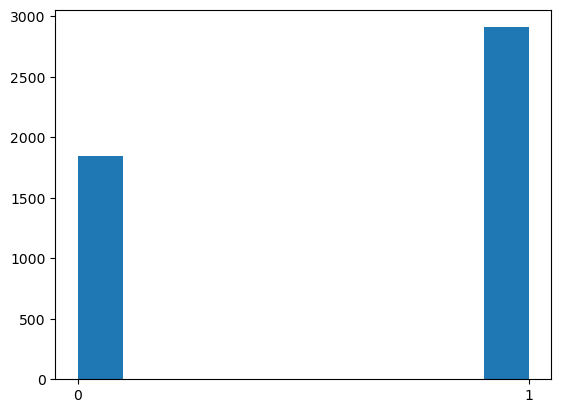

In [14]:
plt.hist(df['Topic_LDA'])
plt.xticks([0, 1]);

In [15]:
topic_1 = df[df['Topic_LDA']==0]
topic_1.shape

(1844, 7)

In [16]:
topic_2 = df[df['Topic_LDA']==1]
topic_2.shape

(2910, 7)

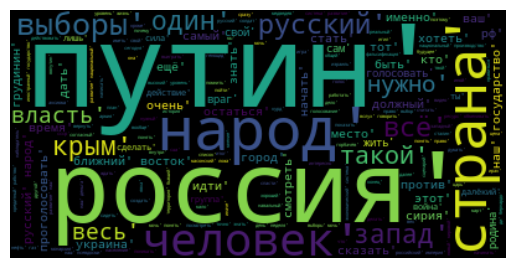

In [17]:
textt = ''.join(w for w in topic_1.tokens)
wordcloud = WordCloud().generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

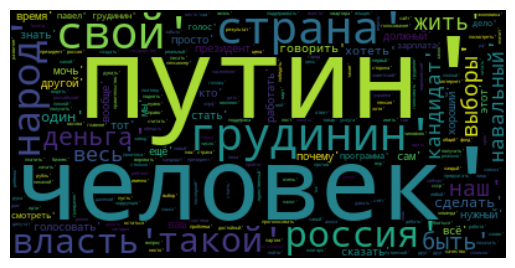

In [18]:
textt = ''.join(w for w in topic_2.tokens)
wordcloud = WordCloud().generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### **Неотрицательная матричная факторизация (NMF)**

In [19]:
tfidf_vect = TfidfVectorizer(max_df=1.0, min_df=2, stop_words=None)
doc_term_matrix = tfidf_vect.fit_transform(df['tokens'].values.astype('U'))

In [20]:
nmf = NMF(n_components=2, random_state=42)
nmf.fit(doc_term_matrix )

NMF(n_components=2, random_state=42)

In [21]:
for i,topic in enumerate(nmf.components_):
    print(f'Top 10 words for topic #{i}:')
    print([tfidf_vect.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['человек', 'народ', 'наш', 'страна', 'выборы', 'навальный', 'россия', 'голосовать', 'президент', 'путин']


Top 10 words for topic #1:
['кандидат', 'россия', 'страна', 'выборы', 'народ', 'наш', 'президент', 'павел', 'голосовать', 'грудинин']




In [22]:
nmf = NMF(n_components=3, random_state=42)
nmf.fit(doc_term_matrix )

NMF(n_components=3, random_state=42)

In [23]:
for i,topic in enumerate(nmf.components_):
    print(f'Top 10 words for topic #{i}:')
    print([tfidf_vect.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['сказать', 'семья', 'смотреть', 'выборы', 'век', 'вообще', 'против', 'победить', 'голосовать', 'путин']


Top 10 words for topic #1:
['агент', 'совхоз', 'народ', 'кандидат', 'олигарх', 'хороший', 'вор', 'павел', 'голосовать', 'грудинин']


Top 10 words for topic #2:
['такой', 'свой', 'народ', 'страна', 'выборы', 'человек', 'наш', 'россия', 'президент', 'навальный']




In [24]:
topic_values = nmf.transform(doc_term_matrix)
topic_values.shape

(4754, 3)

In [25]:
df['Topic_NMF'] = topic_values.argmax(axis=1)
df.head()

,Unnamed: 0.1,Unnamed: 0,post_id,comments_text,tokenized,tokens,Topic_LDA,Topic_NMF
0,0,0,12103.0,"Зачем эта игра в ""демократию"" ?! Результат уже...","['этот', 'игра', 'демократия', 'результат', 'и...","['этот', 'игра', 'демократия', 'результат', 'и...",1,2
1,1,1,12103.0,За Бориса Борисовича Надеждина!!!,"['борис', 'борисович', 'надеждин']","['борис', 'борисович', 'надеждин']",0,0
2,2,5,12103.0,"Я бы вообще , голосовал за Ярослава Нилова !","['вообще', 'голосовать', 'ярослав', 'ниловый']","['вообще', 'голосовать', 'ярослав', 'ниловый']",1,2
3,3,6,12103.0,"Интересно, если бы хоть раз выборы прошли чест...","['интересно', 'выборы', 'пройти', 'честно', 'р...","['интересно', 'выборы', 'пройти', 'честно', 'р...",0,2
4,4,7,12103.0,Выборы - без выбора. Вообще не за кого!!!,"['выборы', 'выбор', 'вообще', 'кто']","['выборы', 'выбор', 'вообще', 'кто']",0,2


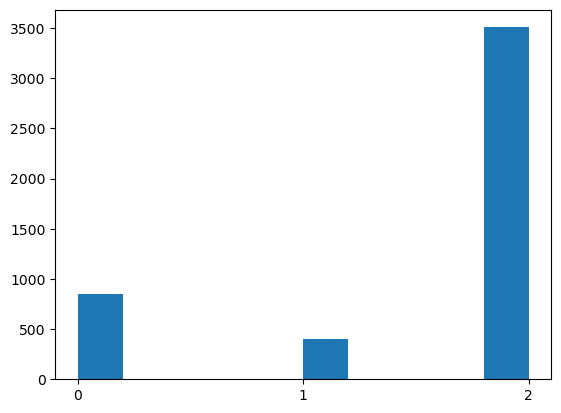

In [26]:
plt.hist(df['Topic_NMF'])
plt.xticks([0, 1, 2]);

In [27]:
topic_1 = df[df['Topic_NMF']==0]
topic_1.shape

(847, 8)

In [28]:
topic_2 = df[df['Topic_NMF']==1]
topic_2.shape

(400, 8)

In [29]:
topic_3 = df[df['Topic_NMF']==2]
topic_3.shape

(3507, 8)

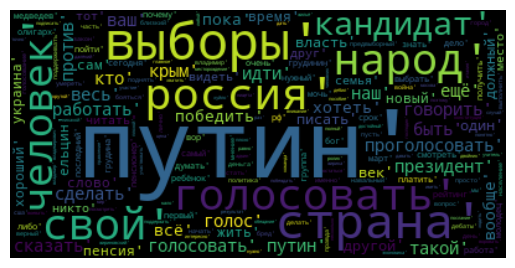

In [30]:
textt = ''.join(w for w in topic_1.tokens)
wordcloud = WordCloud().generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

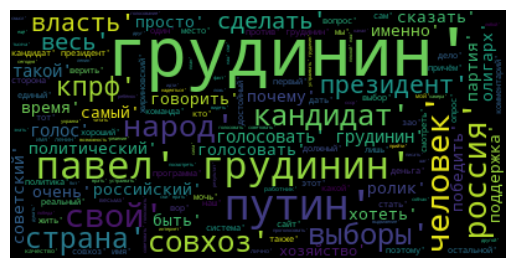

In [31]:
textt = ''.join(w for w in topic_2.tokens)
wordcloud = WordCloud().generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

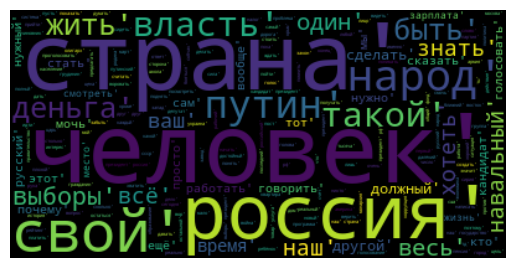

In [32]:
textt = ''.join(w for w in topic_3.tokens)
wordcloud = WordCloud().generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [33]:
nmf = NMF(n_components=2, random_state=42)
nmf.fit(doc_term_matrix )

NMF(n_components=2, random_state=42)

In [34]:
for i,topic in enumerate(nmf.components_):
    print(f'Top 10 words for topic #{i}:')
    print([tfidf_vect.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['человек', 'народ', 'наш', 'страна', 'выборы', 'навальный', 'россия', 'голосовать', 'президент', 'путин']


Top 10 words for topic #1:
['кандидат', 'россия', 'страна', 'выборы', 'народ', 'наш', 'президент', 'павел', 'голосовать', 'грудинин']




In [35]:
topic_values = nmf.transform(doc_term_matrix)
topic_values.shape

(4754, 2)

In [36]:
df['Topic_NMF'] = topic_values.argmax(axis=1)
df.head()

,Unnamed: 0.1,Unnamed: 0,post_id,comments_text,tokenized,tokens,Topic_LDA,Topic_NMF
0,0,0,12103.0,"Зачем эта игра в ""демократию"" ?! Результат уже...","['этот', 'игра', 'демократия', 'результат', 'и...","['этот', 'игра', 'демократия', 'результат', 'и...",1,0
1,1,1,12103.0,За Бориса Борисовича Надеждина!!!,"['борис', 'борисович', 'надеждин']","['борис', 'борисович', 'надеждин']",0,0
2,2,5,12103.0,"Я бы вообще , голосовал за Ярослава Нилова !","['вообще', 'голосовать', 'ярослав', 'ниловый']","['вообще', 'голосовать', 'ярослав', 'ниловый']",1,0
3,3,6,12103.0,"Интересно, если бы хоть раз выборы прошли чест...","['интересно', 'выборы', 'пройти', 'честно', 'р...","['интересно', 'выборы', 'пройти', 'честно', 'р...",0,0
4,4,7,12103.0,Выборы - без выбора. Вообще не за кого!!!,"['выборы', 'выбор', 'вообще', 'кто']","['выборы', 'выбор', 'вообще', 'кто']",0,0


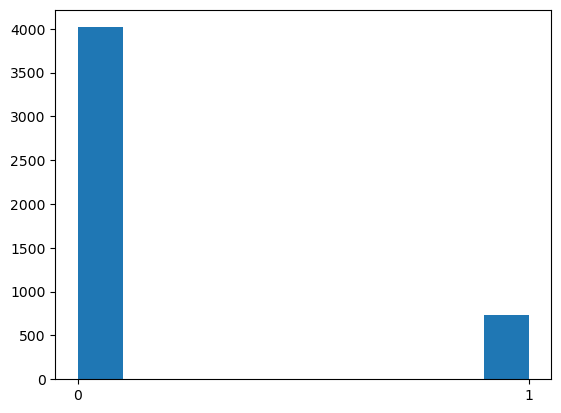

In [37]:
plt.hist(df['Topic_NMF'])
plt.xticks([0, 1]);

In [38]:
topic_1 = df[df['Topic_NMF']==0]
topic_1.shape

(4016, 8)

In [39]:
topic_2 = df[df['Topic_NMF']==1]
topic_2.shape

(738, 8)

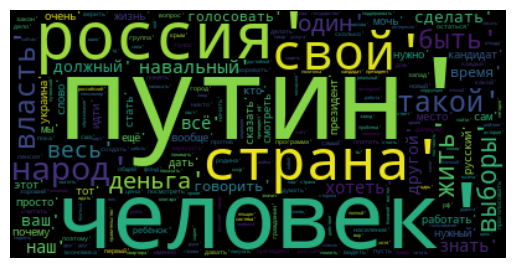

In [40]:
textt = ''.join(w for w in topic_1.tokens)
wordcloud = WordCloud().generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

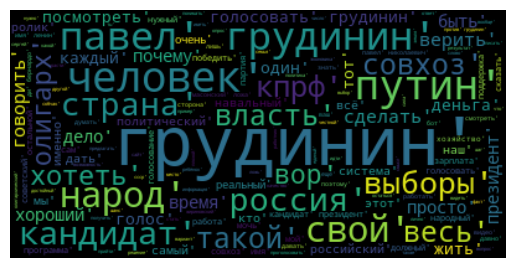

In [41]:
textt = ''.join(w for w in topic_2.tokens)
wordcloud = WordCloud().generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [42]:
df.to_csv('comments_topic.csv')